In [2]:
%matplotlib inline

from modsim import *

In [3]:
init = State(N=90, E=0, F=0, A=0, D=1)

In [4]:
ninja = 1/21
share1 = 0.05 * init.D
share2 = 0.06 * init.D
share3 = 0.07 * init.D
share4 = 0.08 * init.D


In [5]:
def make_system(ninja, share1, share2, share3, share4):
    init = State(N=90, E=0, F=0, A=0, D=1)
    
    t0 = 0
    t_end = 30
    
    return System(init=init, t0=t0, t_end=t_end, share1=share1, share2=share2, share3=share3, share4=share4)

In [6]:
def update(state, system):
    n, e, f, a, d = state
    unpack(system)
    
    exposed = (ninja * n) + (share1 * n)
    familiar = (ninja * e) + (share2 * e)
    admire = (ninja * f) + (share3 * f)
    devote = (ninja * a) + (share4 * a)
    
    n -= exposed
    e += exposed - familiar
    f += familiar - admire
    a += admire - devote
    d += devote 
    
    return State(N=n, E=e, F=f, A=a, D=d)

In [7]:
def run_simulation(system, update_func):
      
    N = TimeSeries()
    E = TimeSeries()
    F = TimeSeries()
    A = TimeSeries()
    D = TimeSeries()
    
    state = system.init
    t0 = system.t0
    N[t0], E[t0], F[t0], A[t0], D[t0] = state
    
    for t in linrange(system.t0, system.t_end):
        state = update(state, system)
        N[t+1], E[t+1], F[t+1], A[t+1], D[t+1] = state
        
    system.N = N
    system.E = E
    system.F = F
    system.A = A
    system.D = D

In [8]:
song = make_system(ninja, share1, share2, share3, share4)
run_simulation(song, update)

In [9]:
def plot_results(N, E, F, A, D):
    print(N)
    plot(N, '-', color='xkcd:light salmon', label='Never Heard')
    plot(E, '-', color='xkcd:grey', label='Exposed')
    plot(F, '-', color='xkcd:dark grey', label='Familiar')
    plot(A, '-', color='xkcd:midnight', label='Admirer')
    plot(D, '-', color='xkcd:aquamarine', label='Devotee')
    decorate(xlabel='Time (days)',
             ylabel='Number of People')

0     90.000000
1     81.214286
2     73.286224
3     66.132093
4     59.676341
5     53.850794
6     48.593930
7     43.850237
8     39.569619
9     35.706870
10    32.221200
11    29.075797
12    26.237445
13    23.676171
14    21.364926
15    19.279302
16    17.397275
17    15.698969
18    14.166451
19    12.783535
20    11.535619
21    10.409523
22     9.393355
23     8.476385
24     7.648928
25     6.902247
26     6.228456
27     5.620440
28     5.071778
29     4.576676
30     4.129905
31     3.726748
dtype: float64


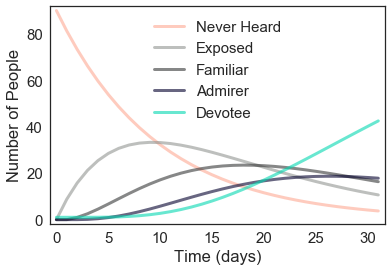

In [10]:
plot_results(song.N, song.E, song.F, song.A, song.D)

In [11]:
song.D

,value
0,1.000000
1,1.000000
2,1.000000
3,1.000000
4,1.014193
5,1.064569
6,1.176331
7,1.374694
8,1.682765
9,2.120222


In [14]:
song.A


,value
0,0.000000
1,0.000000
2,0.000000
3,0.111210
4,0.394743
5,0.875745
6,1.554338
7,2.413988
8,3.427838
9,4.563421


In [15]:
song.F

,value
0,0.000000
1,0.000000
2,0.945510
3,2.531266
4,4.517801
5,6.719615
6,8.995249
7,11.239005
8,13.374031
9,15.346580


In [16]:
song.E

,value
0,0.000000
1,8.785714
2,15.768265
3,21.225431
4,25.396922
5,28.489277
6,30.680152
7,32.122076
8,32.945747
9,33.262906
